In [1]:
# Importing all necessary Libraries

import numpy as np # numpy used for mathematical operation on array
import pandas as pd  # pandas used for data manipulation on dataframe
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings( "ignore" )

In [2]:
#reading the data set named as train
df=pd.read_csv("healthcare-dataset-stroke-data.csv",header=0)

In [3]:
# Checking the shape of the data
df.shape

(5110, 12)

In [4]:
# Reading random Rows of the data

df.sample()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1148,35295,Male,69.0,0,0,Yes,Private,Urban,65.08,27.3,formerly smoked,0


In [5]:
 # checking the information of the dataset
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
#for the description 
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [8]:
df.dtypes


id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [9]:
df.sample()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2776,13440,Male,2.0,0,0,No,children,Urban,107.83,21.2,Unknown,0


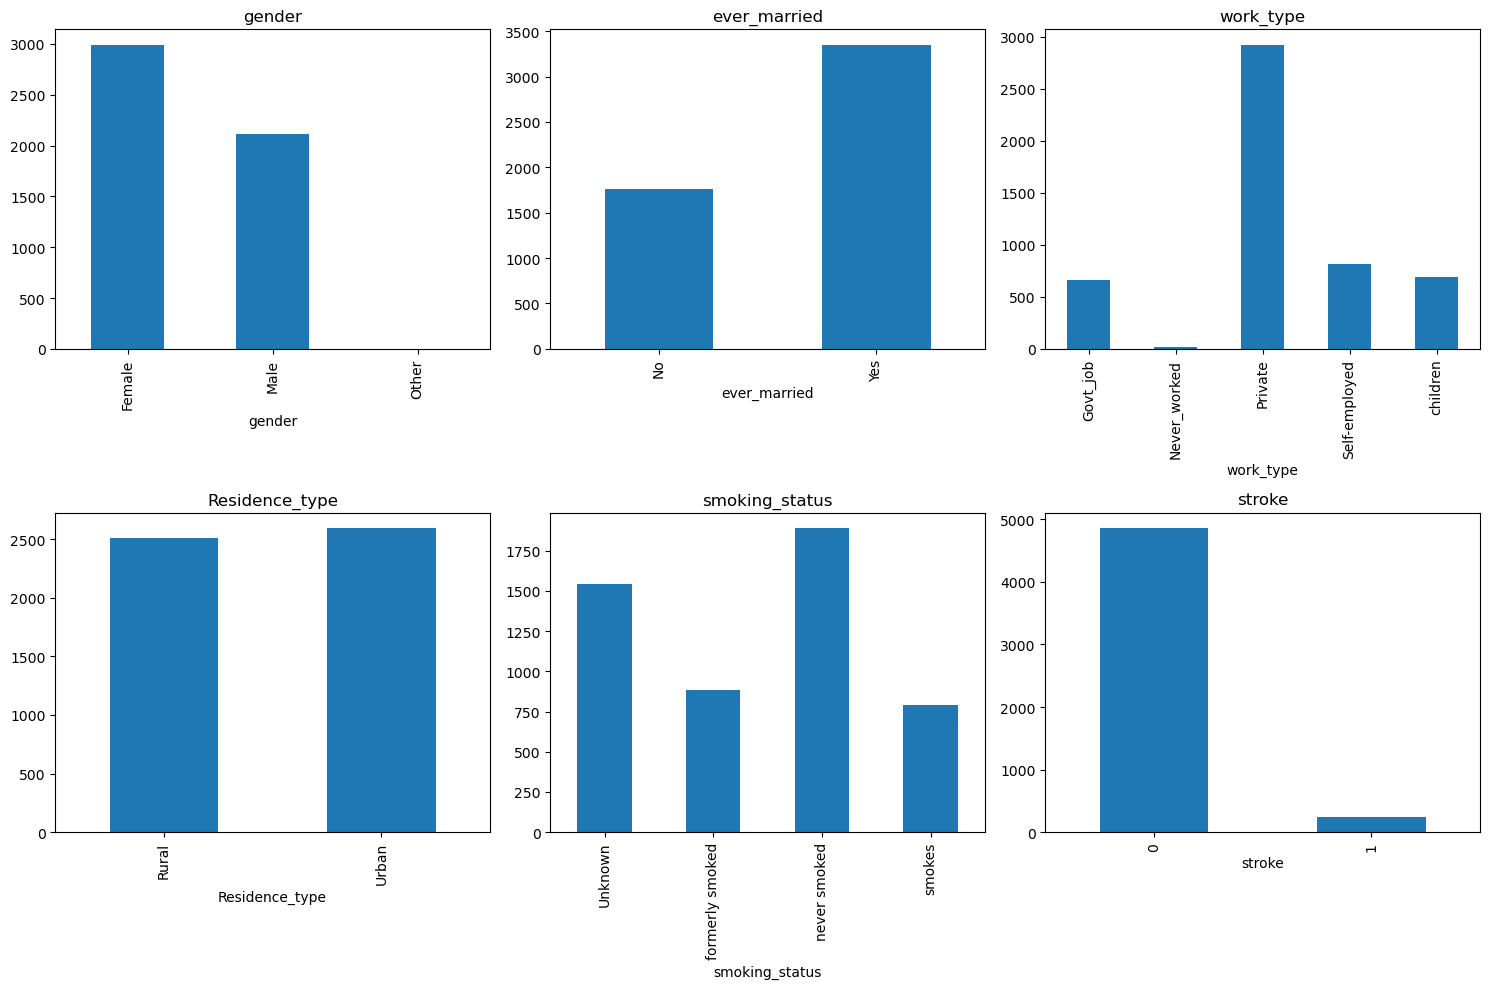

In [10]:
# Select the categorical and numerical features
categorical_features = ['gender','ever_married', 'work_type', 'Residence_type', 'smoking_status','stroke']

# Generate a cross-tabulation table for the categorical features
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    ct = pd.crosstab(index=df[feature], columns='count')
    ax = axs[i // 3, i % 3]
    ct.plot(kind='bar', legend=None, ax=ax)  # set the color of the bars to blue
    ax.set_title(feature)
plt.tight_layout()
plt.show()

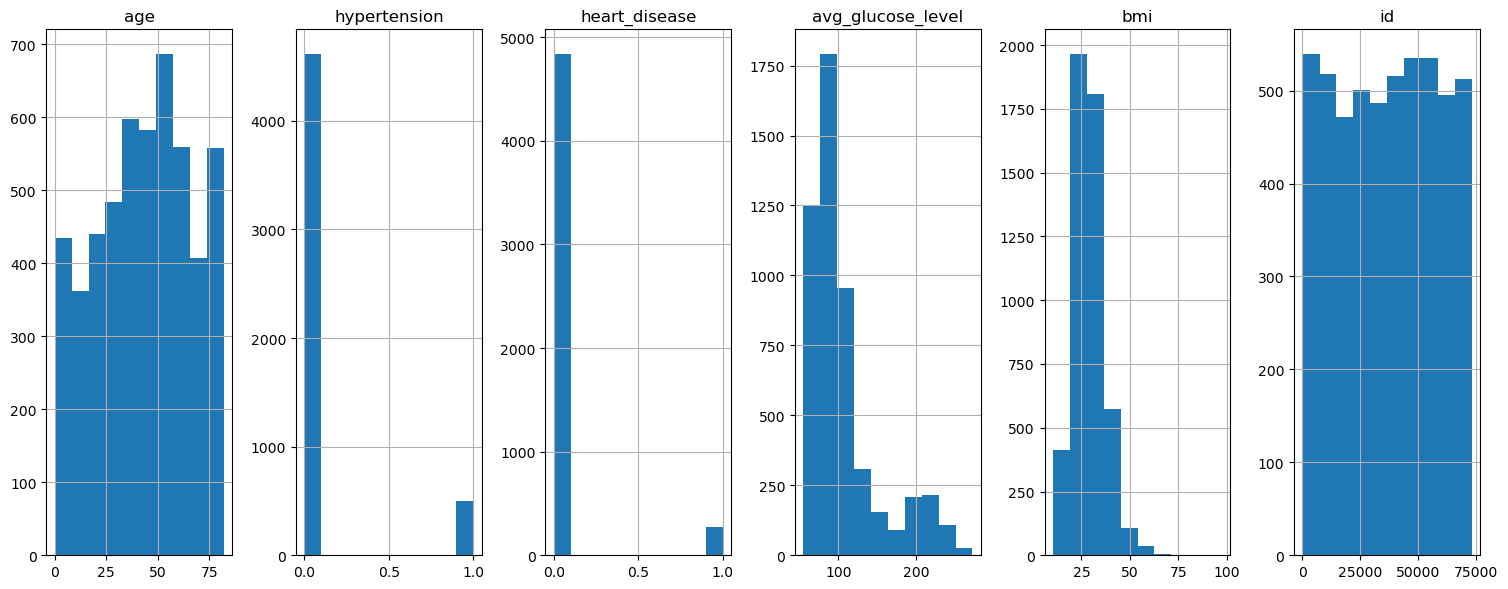

In [11]:
import matplotlib.pyplot as plt

# Select the numerical features
numerical_features = ['age','hypertension','heart_disease','avg_glucose_level', 'bmi','id']
# Create a histogram for each numerical feature
fig, axs = plt.subplots(nrows=1,ncols=6,figsize=(15, 6))
for i, feature in enumerate(numerical_features):
    ax = axs[i]
    df[feature].hist(ax=ax)
    ax.set_title(feature)
plt.tight_layout()
plt.show()


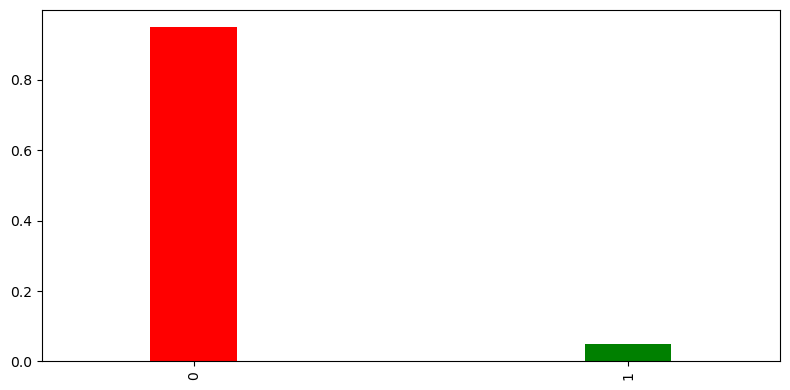

In [12]:
fig, axes =plt.subplots(figsize=(8,4))
df['stroke'].value_counts(normalize=True).plot.bar(width=0.2, color=('red','green'))

plt.tight_layout()
plt.show()

In [13]:
# Data cleaning

In [14]:
#total number of missing value in a table of each column

df.isnull().sum() 

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:>

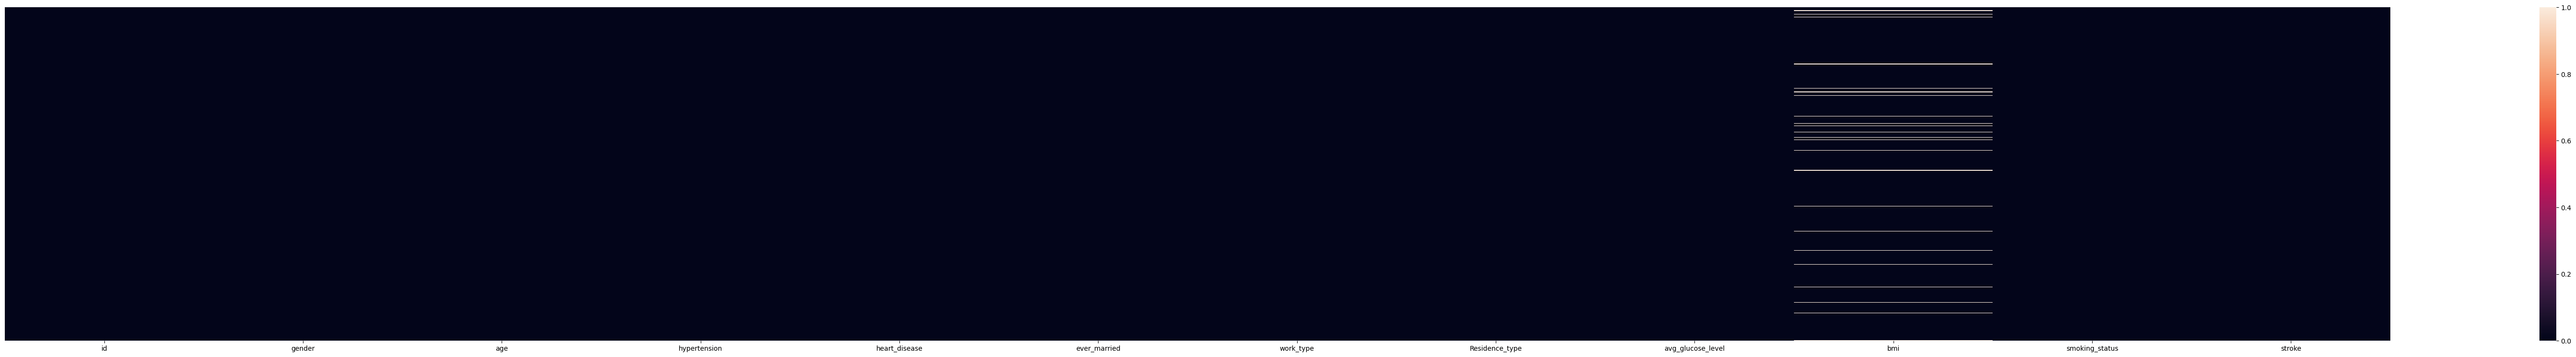

In [15]:
# Plotting a heat map to check null values in each column
plt.figure(figsize=(80,9))
sns.heatmap(df.isnull(),yticklabels= False)

In [16]:
# printing total number of duplicate values
df.duplicated().sum()

0

In [17]:
# Separating the output from the dataset

data_frame = df.loc[:,df.columns!="stroke"]


In [18]:
# Creating output column

y = df["stroke"]


In [19]:
# Excluding/separating a categorical column from numerical columns

df1=data_frame.select_dtypes(exclude=['object'])

In [20]:
data_frame.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
dtype: object

In [21]:
# separating numerical columns from categorical

df2=data_frame.select_dtypes(exclude=['float64','int64'])

In [22]:
data_frame.shape

(5110, 11)

In [23]:
df1.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,9046,67.0,0,1,228.69,36.6
1,51676,61.0,0,0,202.21,NaN
2,31112,80.0,0,1,105.92,32.5
3,60182,49.0,0,0,171.23,34.4
4,1665,79.0,1,0,174.12,24.0


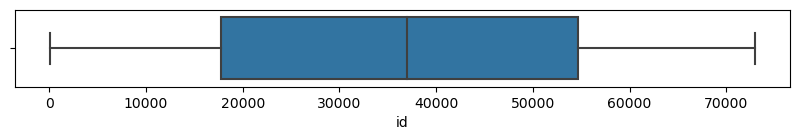

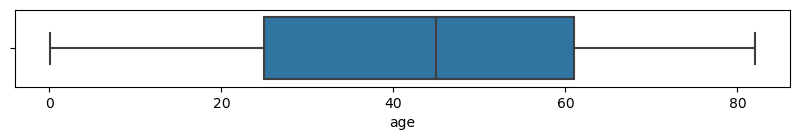

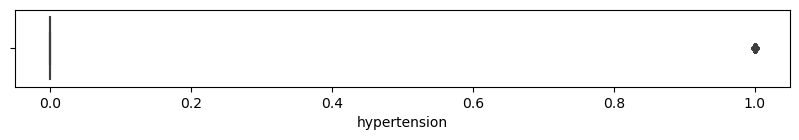

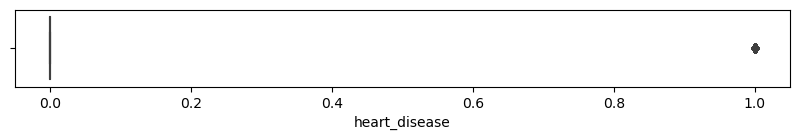

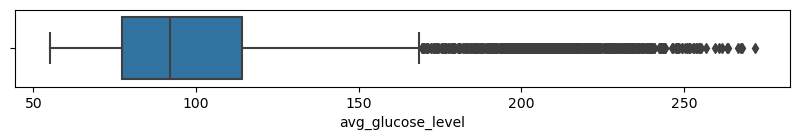

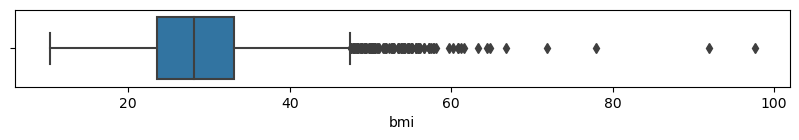

In [24]:
# Applying a box-plot to check the outliers
for column in df1:
    plt.figure(figsize=(10,1))
    sns.boxplot(data=df1,x=column)

In [25]:
# outlier treatment

def cap_data(df1):
    for col in df1.columns:
        print("capping the",col)
        if (((df1[col].dtype)=='float64')|((df1[col].dtype)=='int64')):
            percentiles = df1[col].quantile([0.25,0.75]).values
            df1[col][df1[col] <= percentiles[0]] = percentiles[0]
            df1[col][df1[col] >= percentiles[1]] = percentiles[1]
        else:
            df1[col]=df1[col]
    return df1
final_df1 = cap_data(df1)


capping the id
capping the age
capping the hypertension
capping the heart_disease
capping the avg_glucose_level
capping the bmi


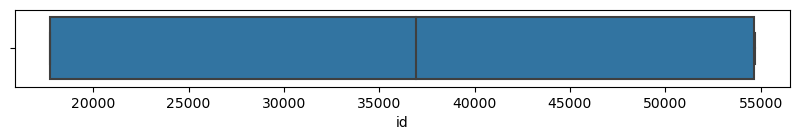

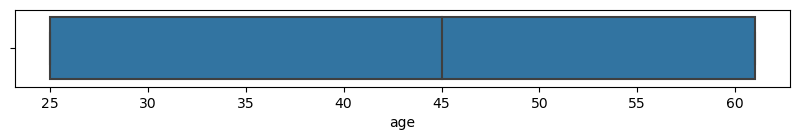

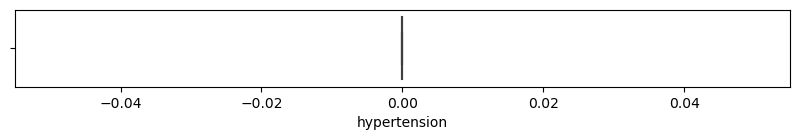

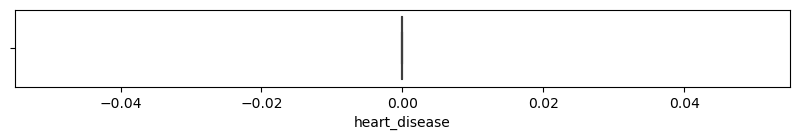

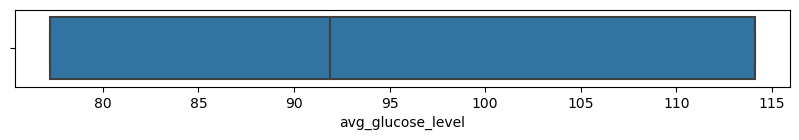

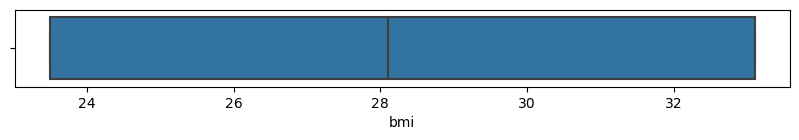

In [26]:
# Applying a box-plot to check the outliers
for column in df1:
    plt.figure(figsize=(10,1))
    sns.boxplot(data=df1,x=column)

In [27]:
# missing value treatment using median
mean_bmi = df1['bmi'].mean()
df1['bmi'] = df1['bmi'].fillna(mean_bmi)

In [28]:
df1['bmi'].isnull().sum()

0

In [29]:
# coverting the categorical features into numerical features using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

df = pd.DataFrame(df2)

# Initialize the OneHotEncoder object and specify columns to be encoded
ohe = OneHotEncoder(sparse=False, categories='auto', drop='first')
columns_to_encode = ['gender','ever_married','work_type', 'Residence_type', 'smoking_status']

# Fit and transform the OneHotEncoder on the selected columns of the dataframe
encoded_cols = ohe.fit_transform(df[columns_to_encode])

# Create a dataframe from the encoded columns with the original column names
encoded_df = pd.DataFrame(encoded_cols, columns=ohe.get_feature_names_out(columns_to_encode))

# Combine the original dataframe with the encoded dataframe
df_encoded = pd.concat([df.drop(columns_to_encode, axis=1), encoded_df], axis=1)

print(df_encoded.head())


   gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0          1.0           0.0               1.0                     0.0   
1          0.0           0.0               1.0                     0.0   
2          1.0           0.0               1.0                     0.0   
3          0.0           0.0               1.0                     0.0   
4          0.0           0.0               1.0                     0.0   

   work_type_Private  work_type_Self-employed  work_type_children  \
0                1.0                      0.0                 0.0   
1                0.0                      1.0                 0.0   
2                1.0                      0.0                 0.0   
3                1.0                      0.0                 0.0   
4                0.0                      1.0                 0.0   

   Residence_type_Urban  smoking_status_formerly smoked  \
0                   1.0                             1.0   
1                   0.

In [30]:
# concatinating numerical and catrgorical columns 
data_frame=pd.concat([df1,df_encoded],axis=1)

In [31]:
data_frame

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,17741.25,61.0,0,0,114.09,33.100000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,51676.00,61.0,0,0,114.09,28.216215,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112.00,61.0,0,0,105.92,32.500000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,54682.00,49.0,0,0,114.09,33.100000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,17741.25,61.0,0,0,114.09,24.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234.00,61.0,0,0,83.75,28.216215,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5106,44873.00,61.0,0,0,114.09,33.100000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5107,19723.00,35.0,0,0,82.99,30.600000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,37544.00,51.0,0,0,114.09,25.600000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
data_frame.shape

(5110, 17)

In [33]:
data_frame.dtypes

id                                float64
age                               float64
hypertension                        int64
heart_disease                       int64
avg_glucose_level                 float64
bmi                               float64
gender_Male                       float64
gender_Other                      float64
ever_married_Yes                  float64
work_type_Never_worked            float64
work_type_Private                 float64
work_type_Self-employed           float64
work_type_children                float64
Residence_type_Urban              float64
smoking_status_formerly smoked    float64
smoking_status_never smoked       float64
smoking_status_smokes             float64
dtype: object

In [34]:
X = data_frame

# Train-Test split

In [35]:
# Importing the train test split 

from sklearn.model_selection import train_test_split

In [36]:
# Separating the Training and testing Data

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,random_state=10)

In [37]:
y_train = np.array(y_train).reshape((-1, 1))

# Feature Scaling

In [38]:
# Importing the standardscaler package for standardization

from sklearn.preprocessing import StandardScaler

In [39]:
# Applying the standardscaler to training data

sc = StandardScaler().fit(X_train)

In [40]:
# Transforming the training data into standard

X_train_std = sc.transform(X_train)
X_train_std

array([[-0.52060061, -1.28092187,  0.        , ..., -0.45745275,
        -0.76108439, -0.43219782],
       [ 0.15007298,  0.57008441,  0.        , ..., -0.45745275,
        -0.76108439, -0.43219782],
       [ 0.40636445, -1.1438103 ,  0.        , ..., -0.45745275,
        -0.76108439,  2.3137553 ],
       ...,
       [ 1.19794653,  0.22730546,  0.        , ..., -0.45745275,
        -0.76108439,  2.3137553 ],
       [ 0.06827218, -1.28092187,  0.        , ..., -0.45745275,
         1.31391474, -0.43219782],
       [ 1.15047285,  1.1870865 ,  0.        , ..., -0.45745275,
         1.31391474, -0.43219782]])

In [41]:
import numpy as np

class LogisticRegression:
        
    def __init__(self, learning_rate=0.01, num_iterations=10000, n_classes=2):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        
    
    def softmax(self, Z):
        return np.exp(Z) / np.sum(np.exp(Z), axis=1, keepdims=True)
    
    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))
    
    def initialize_weights(self, n_features):
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
    
    def fit(self, X, y, n_classes, learning_rate=0.01, num_iterations=1000):
        n_samples, n_features = X.shape
        self.initialize_weights(n_features)
        
        for i in range(num_iterations):
            Z = np.dot(X, self.weights) + self.bias
            
            if n_classes == 2:
                A = self.sigmoid(Z)
                cost = -(1/n_samples) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
                dZ = A - y
            else:
                A = self.softmax(Z)
                cost = -(1/n_samples) * np.sum(y*np.log(A))
                dZ = A - y
            
            dw = (1/n_samples) * np.dot(X.T, dZ)
            db = (1/n_samples) * np.sum(dZ)
            
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db
    
    def predict(self, X):
        Z = np.dot(X, self.weights) + self.bias
        
        if self.weights.shape[0] == 1:
            A = self.sigmoid(Z)
            return np.round(A)
        else:
            A = self.softmax(Z)
            return np.argmax(A, axis=1)

In [42]:

model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train_std, y_train,n_classes=1)
y_pred = model.predict(X_test)

In [43]:
# Importing accuracy-score and confusion_matrix package

from sklearn.metrics import accuracy_score

In [44]:
# Checking the accuracy Score

accuracy_score(y_test, y_pred)

0.9478147423352903

# train-test split

In [45]:
# Importing the train test split 

from sklearn.model_selection import train_test_split

In [46]:
# Separating the Training and testing Data

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y,test_size=0.30,random_state=6)

# Feature Scaling

In [47]:
# Importing the standardscaler package for standardization

from sklearn.preprocessing import StandardScaler

In [48]:
# Applying the standardscaler to training data

sc = StandardScaler().fit(X_train1)

In [49]:
# Transforming the training data into standard

X_train_std1 = sc.transform(X_train1)
X_train_std1

array([[ 0.58335817,  0.16838822,  0.        , ..., -0.45655881,
         1.29591695, -0.42442734],
       [-1.23120242,  0.92309506,  0.        , ..., -0.45655881,
         1.29591695, -0.42442734],
       [-1.23120242, -0.92936718,  0.        , ..., -0.45655881,
        -0.77165439,  2.35611588],
       ...,
       [-0.27193535,  0.64865621,  0.        , ..., -0.45655881,
         1.29591695, -0.42442734],
       [ 0.17934852,  1.1975339 ,  0.        , ..., -0.45655881,
         1.29591695, -0.42442734],
       [-1.23120242, -0.03744092,  0.        , ...,  2.19029834,
        -0.77165439, -0.42442734]])

# model with sklearn

In [50]:
#importing LogisticRegression package

from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train1, y_train1)
predictions = model1.predict(X_test1)

In [51]:
# Importing accuracy-score

from sklearn.metrics import accuracy_score

In [52]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train1, y_train1)


LogisticRegression()

In [53]:
# Checking the accuracy Score

accuracy_score(y_test1, predictions)

0.9536855838225701

In [57]:
# storing the accuracy of the scores

In [58]:
# Define the accuracy scores for stroke_prediction Model  without sklearn in Notebook 1
model1_nb1_scores = [0.9478]

# Store the scores for stroke_prediction Model without sklearn in Notebook 1
%store model1_nb1_scores

# Define the accuracy scores for stroke_prediction Model with-sklearn in Notebook 1
model2_nb1_scores = [0.9536]

# Store the scores for Model stroke_prediction with-sklearn in Notebook 1
%store model2_nb1_scores


Stored 'model1_nb1_scores' (list)
Stored 'model2_nb1_scores' (list)
